In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [10]:
dataset=pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv')
dataset.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [13]:
df=dataset


In [15]:
df.columns = df.columns.str.lower().str.replace(' ', '_')



In [37]:
df.dtypes

laptop           object
status           object
brand            object
model            object
cpu              object
ram               int64
storage           int64
storage_type     object
gpu              object
screen          float64
touch            object
final_price     float64
dtype: object

In [17]:
df = df.drop(['laptop', 'status','brand','model','cpu','storage_type','gpu','touch'], axis=1)



In [19]:
df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [ ]:
#Q1: 'The column with missing values is: screen'

<Axes: xlabel='final_price', ylabel='Count'>

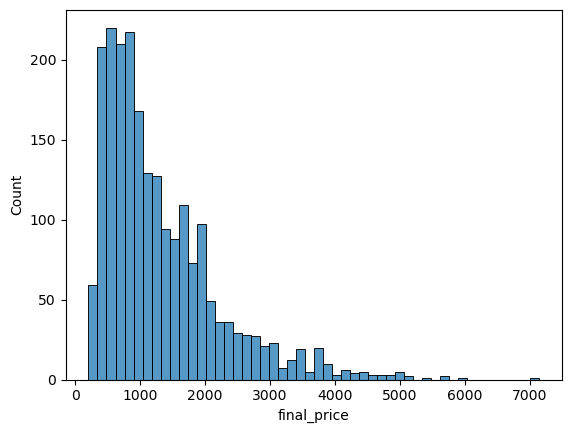

In [23]:
sns.histplot(df.final_price, bins=50)

In [ ]:
#EDA
Look at the final_price variable. Does it have a long tail?
yes, it does have long tail


In [31]:
#Q2
f"The median for 'ram' is: {df['ram'].median():.0f}"

"The median for 'ram' is: 16"

In [56]:
n = len(df)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test

In [58]:
n_val,n_test,n_train

(432, 432, 1296)

In [60]:
idx = np.arange(n)

In [62]:
np.random.seed(42)
np.random.shuffle(idx)

In [64]:
len(df_train ),len(df_val),len(df_test)

(864, 432, 432)

In [89]:
#Prepare and Split the Dataset
def prep_X_y(df, fillna_method, seed=42):
    """
    fillna_method can either be "mean" or 0
    """
    n = len(df)
    n_val = n_test =  int(0.2 * n)
    n_train = n - n_val - n_test

    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    df = (
        df
        .assign(
            screen=df["screen"].fillna(df.loc[idx[:n_train], "screen"].mean() if fillna_method=="mean" else 0)
        )
        .assign(
            
        )
    )

    X = df.drop(columns="final_price").values
    X = np.column_stack([np.ones(X.shape[0]), X])

    y = df["final_price"].values

    X_train = X[idx[:n_train]]
    X_val = X[idx[n_train:n_train+n_val]]
    X_test = X[idx[n_train+n_val:]]
    
    y_train = y[idx[:n_train]]
    y_val = y[idx[n_train:n_train+n_val]]
    y_test = y[idx[n_train+n_val:]]

    return (X_train, X_val, X_test, y_train, y_val, y_test)

In [91]:
#Q3
def train_linear_regression(X, y, r=0):
    """By default no regularization is applied. 
    Set r to nonzero value for regularization."""
    return np.linalg.inv(X.T @ X + r * np.eye(X.shape[1])) @ X.T @ y

def rmse(y, y_hat):
    return np.sqrt(((y_hat - y) ** 2).mean())

In [95]:
# fillna with 0
X_train, X_val, X_test, y_train, y_val, y_test = prep_X_y(df, fillna_method=0)
w = train_linear_regression(X_train, y_train)
y_hat_val = X_val @ w

print(f"RMSE for option to fill with 0 is: {round(rmse(y_val, y_hat_val), 2)}")

# fillna with mean
X_train, X_val, X_test, y_train, y_val, y_test = prep_X_y(df, "mean")
w = train_linear_regression(X_train, y_train)
y_hat_val = X_val @ w

print(f"RMSE for option to fill with mean is: {round(rmse(y_val, y_hat_val), 2)}")

RMSE for option to fill with 0 is: 597.36
RMSE for option to fill with mean is: 600.27


In [97]:
#q4
r_list = [0, 0.01, 0.1, 1, 5, 10, 100]
rmse_list = []

for r in r_list:
    X_train, X_val, X_test, y_train, y_val, y_test = prep_X_y(df, fillna_method=0)
    w = train_linear_regression(X_train, y_train, r)
    y_hat_val = X_val @ w
   
    rmse_list.append(round(rmse(y_val, y_hat_val), 2))
    print(f"RMSE for r={r}: {rmse_list[-1]:.2f}")

RMSE for r=0: 597.36
RMSE for r=0.01: 597.36
RMSE for r=0.1: 597.35
RMSE for r=1: 597.21
RMSE for r=5: 597.01
RMSE for r=10: 597.06
RMSE for r=100: 597.90


In [99]:
#Q5
seed_list = range(10)
rmse_list = []

for seed in seed_list:
    X_train, X_val, X_test, y_train, y_val, y_test = prep_X_y(df, fillna_method=0, seed=seed)
    w = train_linear_regression(X_train, y_train)
    y_hat_val = X_val @ w
   
    rmse_list.append(round(rmse(y_val, y_hat_val), 2))

print(f"The standard deviation of all the scores is: {np.std(rmse_list):.3f}")

The standard deviation of all the scores is: 29.176


In [101]:
#Q6
X_train, X_val, X_test, y_train, y_val, y_test = prep_X_y(df, fillna_method=0, seed=9)
X_train_val = np.vstack([X_train, X_val])
y_train_val = np.hstack([y_train, y_val])
w = train_linear_regression(X_train_val, y_train_val, r=0.001)
y_hat_test = X_test @ w
print(round(rmse(y_test, y_hat_test), 2))

608.61
